In [100]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
from shapely import geometry
import matplotlib.pyplot as plt


%matplotlib inline

In [101]:
lito = gpd.read_file('../../database/vectors/litologia/litologia_shp.shp')

In [102]:
lito.shape

(229, 2)

In [103]:
lito.head()

,Litologia,geometry
0,NpGM,"POLYGON ((329556.288 7614512.402, 329553.552 7..."
1,NpGM,"POLYGON ((329550.870 7615028.946, 329549.753 7..."
2,NpGM,"POLYGON ((329527.948 7617214.349, 329518.242 7..."
3,NpGM,"POLYGON ((329484.688 7621338.655, 329409.535 7..."
4,NpGM,"POLYGON ((333613.505 7628546.006, 334660.842 7..."


In [104]:
crs = "+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
lito = gpd.GeoDataFrame(lito, geometry='geometry', crs=crs)
lito.head()

,Litologia,geometry
0,NpGM,"POLYGON ((329556.288 7614512.402, 329553.552 7..."
1,NpGM,"POLYGON ((329550.870 7615028.946, 329549.753 7..."
2,NpGM,"POLYGON ((329527.948 7617214.349, 329518.242 7..."
3,NpGM,"POLYGON ((329484.688 7621338.655, 329409.535 7..."
4,NpGM,"POLYGON ((333613.505 7628546.006, 334660.842 7..."


<AxesSubplot:>

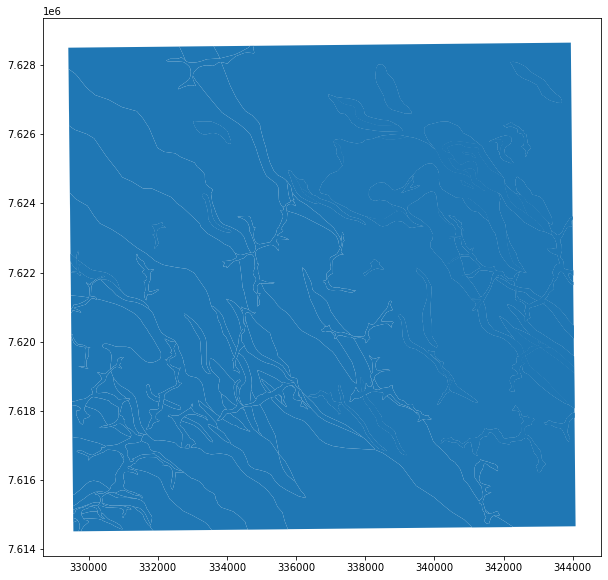

In [105]:
lito.plot(figsize=(10,10))

In [106]:
lito.to_csv('../../database/csv/litologia/litologia_caconde.csv')

,Litologia,Unnamed: 1
0,NpGM,NaN
1,NpGM,NaN
2,NpGM,NaN
3,NpGM,NaN
4,NpGM,NaN
...,...,...
224,PGQ,NaN
225,PMAI,NaN
226,PMAI,NaN
227,PGQ,NaN


['LITOLOGIA', 'geometry']

,LITOLOGIA
0,",Litologia,geometry"
1,"0,NpGM,""POLYGON"
2,"1,NpGM,""POLYGON"
3,"2,NpGM,""POLYGON"
4,"3,NpGM,""POLYGON"


### Abrindo aerogeofisico de Caconde

In [107]:
gama_caconde = pd.read_csv('../../database/csv/gama_caconde.csv')

In [108]:
gama_caconde.head()

,Unnamed: 0,Unnamed: 0.1,KPERC,eU,eTH,UTHRAZAO,X,Y,MDT,THKRAZAO,CTCOR,LATITUDE,LONGITUDE,geometry
0,43067,58537,1.18,0.85,13.02,0.1,329881.51,7628583.57,1087.97,12.90,18.5,-21.437115,-46.641537,POINT (329881.51 7628583.57)
1,43068,58538,1.38,1.05,11.29,0.1,329882.13,7628508.28,1095.99,12.97,20.1,-21.437795,-46.641538,POINT (329882.13 7628508.28)
2,43069,58539,1.05,0.97,15.29,0.1,329883.09,7628433.00,1107.18,13.24,22.5,-21.438475,-46.641537,POINT (329883.09 7628433)
3,43070,58540,0.93,1.31,17.06,0.1,329884.05,7628358.09,1117.10,13.74,24.4,-21.439152,-46.641535,POINT (329884.05 7628358.09)
4,43071,58541,0.98,1.56,14.25,0.1,329885.17,7628283.36,1123.75,14.51,23.7,-21.439827,-46.641532,POINT (329885.17 7628283.36)


In [109]:
gama_caconde['geometry'] = [geometry.Point(x, y) for x, y in zip(gama_caconde['X'], gama_caconde['Y'])]

In [110]:
crs = "+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
gama_caconde = gpd.GeoDataFrame(gama_caconde, geometry='geometry', crs=crs)
gama_caconde.head()

,Unnamed: 0,Unnamed: 0.1,KPERC,eU,eTH,UTHRAZAO,X,Y,MDT,THKRAZAO,CTCOR,LATITUDE,LONGITUDE,geometry
0,43067,58537,1.18,0.85,13.02,0.1,329881.51,7628583.57,1087.97,12.90,18.5,-21.437115,-46.641537,POINT (329881.510 7628583.570)
1,43068,58538,1.38,1.05,11.29,0.1,329882.13,7628508.28,1095.99,12.97,20.1,-21.437795,-46.641538,POINT (329882.130 7628508.280)
2,43069,58539,1.05,0.97,15.29,0.1,329883.09,7628433.00,1107.18,13.24,22.5,-21.438475,-46.641537,POINT (329883.090 7628433.000)
3,43070,58540,0.93,1.31,17.06,0.1,329884.05,7628358.09,1117.10,13.74,24.4,-21.439152,-46.641535,POINT (329884.050 7628358.090)
4,43071,58541,0.98,1.56,14.25,0.1,329885.17,7628283.36,1123.75,14.51,23.7,-21.439827,-46.641532,POINT (329885.170 7628283.360)


In [111]:
mag_caconde = pd.read_csv('../../database/csv/mag_caconde.csv')

In [112]:
mag_caconde['geometry'] = [geometry.Point(x, y) for x, y in zip(mag_caconde['X'], mag_caconde['Y'])]

In [113]:
crs = "+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
mag_caconde = gpd.GeoDataFrame(mag_caconde, geometry='geometry', crs=crs)
mag_caconde.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,X,Y,MDT,LATITUDE,LONGITUDE,MAGIGRF,MAGMIC,MAGNIV,geometry
0,432048,587819,587819,329881.24,7628644.09,1093.96,-21.436568,-46.641533,35.583,23127.012,23121.105,POINT (329881.240 7628644.090)
1,432049,587820,587820,329881.28,7628636.53,1094.59,-21.436637,-46.641534,36.068,23127.478,23121.577,POINT (329881.280 7628636.530)
2,432050,587821,587821,329881.32,7628628.98,1095.22,-21.436705,-46.641534,36.535,23127.946,23122.051,POINT (329881.320 7628628.980)
3,432051,587822,587822,329881.37,7628621.42,1095.86,-21.436773,-46.641534,36.982,23128.389,23122.503,POINT (329881.370 7628621.420)
4,432052,587823,587823,329881.41,7628613.87,1096.50,-21.436841,-46.641535,37.412,23128.807,23122.928,POINT (329881.410 7628613.870)


<AxesSubplot:>

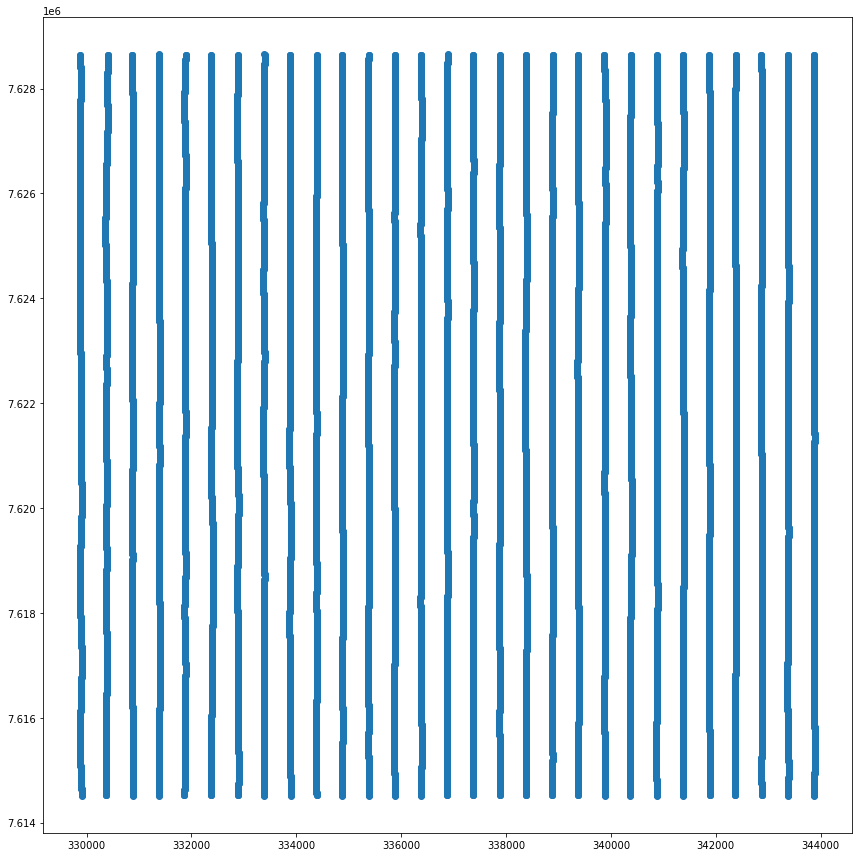

In [114]:
mag_caconde.plot(figsize=(15,15))

# Biblioteca Fatiando a Terra

In [115]:
"""
Create and operate on grids and profiles.

**Grid generation**

* :func:`~fatiando.gridder.regular`
* :func:`~fatiando.gridder.scatter`

**Grid operations**

* :func:`~fatiando.gridder.cut`
* :func:`~fatiando.gridder.profile`

**Interpolation**

* :func:`~fatiando.gridder.interp`
* :func:`~fatiando.gridder.interp_at`
* :func:`~fatiando.gridder.extrapolate_nans`

**Input/Output**

* :func:`~fatiando.gridder.load_surfer`: Read a Surfer grid file and return
  three 1d numpy arrays and the grid shape

**Misc**

* :func:`~fatiando.gridder.spacing`

----

"""

import numpy
import scipy.interpolate
import matplotlib.mlab


def load_surfer(fname, fmt='ascii'):
    """
    Read a Surfer grid file and return three 1d numpy arrays and the grid shape

    Surfer is a contouring, gridding and surface mapping software
    from GoldenSoftware. The names and logos for Surfer and Golden
    Software are registered trademarks of Golden Software, Inc.

    http://www.goldensoftware.com/products/surfer

    According to Surfer structure, x and y are horizontal and vertical
    screen-based coordinates respectively. If the grid is in geographic
    coordinates, x will be longitude and y latitude. If the coordinates
    are cartesian, x will be the easting and y the norting coordinates.

    WARNING: This is opposite to the convention used for Fatiando.
    See io_surfer.py in cookbook.

    Parameters:

    * fname : str
        Name of the Surfer grid file
    * fmt : str
        File type, can be 'ascii' or 'binary'

    Returns:

    * x : 1d-array
        Value of the horizontal coordinate of each grid point.
    * y : 1d-array
        Value of the vertical coordinate of each grid point.
    * grd : 1d-array
        Values of the field in each grid point. Field can be for example
        topography, gravity anomaly etc
    * shape : tuple = (ny, nx)
        The number of points in the vertical and horizontal grid dimensions,
        respectively

    """
    assert fmt in ['ascii', 'binary'], "Invalid grid format '%s'. Should be \
        'ascii' or 'binary'." % (fmt)
    if fmt == 'ascii':
        # Surfer ASCII grid structure
        # DSAA            Surfer ASCII GRD ID
        # nCols nRows     number of columns and rows
        # xMin xMax       X min max
        # yMin yMax       Y min max
        # zMin zMax       Z min max
        # z11 z21 z31 ... List of Z values
        with open(fname) as ftext:
            # DSAA is a Surfer ASCII GRD ID
            id = ftext.readline()
            # Read the number of columns (nx) and rows (ny)
            nx, ny = [int(s) for s in ftext.readline().split()]
            # Read the min/max value of x (columns/longitue)
            xmin, xmax = [float(s) for s in ftext.readline().split()]
            # Read the min/max value of  y(rows/latitude)
            ymin, ymax = [float(s) for s in ftext.readline().split()]
            # Read the min/max value of grd
            zmin, zmax = [float(s) for s in ftext.readline().split()]
            data = numpy.fromiter((float(i) for line in ftext for i in
                                   line.split()), dtype='f')
            grd = numpy.ma.masked_greater_equal(data, 1.70141e+38)
        # Create x and y numpy arrays
        x = numpy.linspace(xmin, xmax, nx)
        y = numpy.linspace(ymin, ymax, ny)
        x, y = [tmp.ravel() for tmp in numpy.meshgrid(x, y)]
    if fmt == 'binary':
        raise NotImplementedError(
            "Binary file support is not implemented yet.")
    return x, y, grd, (ny, nx)

def regular(area, shape, z=None):
    """
    Create a regular grid. Order of the output grid is x varies first, then y.

    Parameters:

    * area
        ``(x1, x2, y1, y2)``: Borders of the grid
    * shape
        Shape of the regular grid, ie ``(ny, nx)``.
    * z
        Optional. z coordinate of the grid points. If given, will return an
        array with the value *z*.

    Returns:

    * ``[xcoords, ycoords]``
        Numpy arrays with the x and y coordinates of the grid points
    * ``[xcoords, ycoords, zcoords]``
        If *z* given. Numpy arrays with the x, y, and z coordinates of the grid
        points

    """
    ny, nx = shape
    x1, x2, y1, y2 = area
    dy, dx = spacing(area, shape)
    x_range = numpy.arange(x1, x2, dx)
    y_range = numpy.arange(y1, y2, dy)
    # Need to make sure that the number of points in the grid is correct
    # because of rounding errors in arange. Sometimes x2 and y2 are included,
    # sometimes not
    if len(x_range) < nx:
        x_range = numpy.append(x_range, x2)
    if len(y_range) < ny:
        y_range = numpy.append(y_range, y2)
    assert len(x_range) == nx, "Failed! x_range doesn't have nx points"
    assert len(y_range) == ny, "Failed! y_range doesn't have ny points"
    xcoords, ycoords = [mat.ravel()
                        for mat in numpy.meshgrid(x_range, y_range)]
    if z is not None:
        zcoords = z * numpy.ones_like(xcoords)
        return [xcoords, ycoords, zcoords]
    else:
        return [xcoords, ycoords]

def scatter(area, n, z=None, seed=None):
    """
    Create an irregular grid with a random scattering of points.

    Parameters:

    * area
        ``(x1, x2, y1, y2)``: Borders of the grid
    * n
        Number of points
    * z
        Optional. z coordinate of the points. If given, will return an
        array with the value *z*.
    * seed : None or int
        Seed used to generate the pseudo-random numbers. If `None`, will use a
        different seed every time. Use the same seed to generate the same
        random points.

    Returns:

    * ``[xcoords, ycoords]``
        Numpy arrays with the x and y coordinates of the points
    * ``[xcoords, ycoords, zcoords]``
        If *z* given. Arrays with the x, y, and z coordinates of the points

    """
    x1, x2, y1, y2 = area
    numpy.random.seed(seed)
    xcoords = numpy.random.uniform(x1, x2, n)
    ycoords = numpy.random.uniform(y1, y2, n)
    numpy.random.seed()
    if z is not None:
        zcoords = z * numpy.ones(n)
        return [xcoords, ycoords, zcoords]
    else:
        return [xcoords, ycoords]

def spacing(area, shape):
    """
    Returns the spacing between grid nodes

    Parameters:

    * area
        ``(x1, x2, y1, y2)``: Borders of the grid
    * shape
        Shape of the regular grid, ie ``(ny, nx)``.

    Returns:

    * ``[dy, dx]``
        Spacing the y and x directions

    """
    x1, x2, y1, y2 = area
    ny, nx = shape
    dx = float(x2 - x1) / float(nx - 1)
    dy = float(y2 - y1) / float(ny - 1)
    return [dy, dx]

def interp(x, y, v, shape, area=None, algorithm='cubic', extrapolate=False):
    """
    Interpolate data onto a regular grid.

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.
    * shape : tuple = (ny, nx)
        Shape of the interpolated regular grid, ie (ny, nx).
    * area : tuple = (x1, x2, y1, y2)
        The are where the data will be interpolated. If None, then will get the
        area from *x* and *y*.
    * algorithm : string
        Interpolation algorithm. Either ``'cubic'``, ``'nearest'``,
        ``'linear'`` (see scipy.interpolate.griddata), or ``'nn'`` for nearest
        neighbors (using matplotlib.mlab.griddata)
    * extrapolate : True or False
        If True, will extrapolate values outside of the convex hull of the data
        points.

    Returns:

    * ``[x, y, v]``
        Three 1D arrays with the interpolated x, y, and v

    """
    if algorithm not in ['cubic', 'linear', 'nearest', 'nn']:
        raise ValueError("Invalid interpolation algorithm: " + str(algorithm))
    ny, nx = shape
    if area is None:
        area = (x.min(), x.max(), y.min(), y.max())
    x1, x2, y1, y2 = area
    xs = numpy.linspace(x1, x2, nx)
    ys = numpy.linspace(y1, y2, ny)
    xp, yp = [i.ravel() for i in numpy.meshgrid(xs, ys)]
    if algorithm == 'nn':
        grid = matplotlib.mlab.griddata(x, y, v, numpy.reshape(xp, shape),
                                        numpy.reshape(yp, shape),
                                        interp='nn').ravel()
        if extrapolate and numpy.ma.is_masked(grid):
            grid = extrapolate_nans(xp, yp, grid)
    else:
        grid = interp_at(x, y, v, xp, yp, algorithm=algorithm,
                         extrapolate=extrapolate)
    return [xp, yp, grid]


def interp_at(x, y, v, xp, yp, algorithm='cubic', extrapolate=False):
    """
    Interpolate data onto the specified points.

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.
    * xp, yp : 1D arrays
        Points where the data values will be interpolated
    * algorithm : string
        Interpolation algorithm. Either ``'cubic'``, ``'nearest'``,
        ``'linear'`` (see scipy.interpolate.griddata)
    * extrapolate : True or False
        If True, will extrapolate values outside of the convex hull of the data
        points.

    Returns:

    * v : 1D array
        1D array with the interpolated v values.

    """
    if algorithm not in ['cubic', 'linear', 'nearest']:
        raise ValueError("Invalid interpolation algorithm: " + str(algorithm))
    grid = scipy.interpolate.griddata((x, y), v, (xp, yp),
                                      method=algorithm).ravel()
    if extrapolate and algorithm != 'nearest' and numpy.any(numpy.isnan(grid)):
        grid = extrapolate_nans(xp, yp, grid)
    return grid

def profile(x, y, v, point1, point2, size, extrapolate=False):
    """
    Extract a data profile between 2 points.

    Uses interpolation to calculate the data values at the profile points.

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.
    * point1, point2 : lists = [x, y]
        Lists the x, y cag_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)oordinates of the 2 points between which the profile
        will be extracted.
    * size : int
        Number of points along the profile.
    * extrapolate : True or False
        If True, will extrapolate values outside of the convex hull of the data
        points.

    Returns:

    * [xp, yp, distances, vp] : 1d arrays
        ``xp`` and ``yp`` are the x, y coordinates of the points along the
        profile.
        ``distances`` are the distances of the profile points to ``point1``
        ``vp`` are the data points along the profile.

    """
    x1, y1 = point1
    x2, y2 = point2
    maxdist = numpy.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    distances = numpy.linspace(0, maxdist, size)
    angle = numpy.arctan2(y2 - y1, x2 - x1)
    xp = x1 + distances * numpy.cos(angle)
    yp = y1 + distances * numpy.sin(angle)
    vp = interp_at(x, y, v, xp, yp, algorithm='cubic', extrapolate=extrapolate)
    return xp, yp, distances, vp


def extrapolate_nans(x, y, v):
    """"
    Extrapolate the NaNs or masked values in a grid INPLACE using nearest
    value.

    .. warning:: Replaces the NaN or masked values of the original array!

    Parameters:

    * x, y : 1D arrays
        Arrays with the x and y coordinates of the data points.
    * v : 1D array
        Array with the scalar value assigned to the data points.

    Returns:

    * v : 1D array
        The array with NaNs or masked values extrapolated.

    """
    if numpy.ma.is_masked(v):
        nans = v.mask
    else:
        nans = numpy.isnan(v)
    notnans = numpy.logical_not(nans)
    v[nans] = scipy.interpolate.griddata((x[notnans], y[notnans]), v[notnans],
                                         (x[nans], y[nans]),
                                         method='nearest').ravel()
    return v


def cut(x, y, scalars, area):
    """
    Return a subsection of a grid.

    The returned subsection is not a copy! In technical terms, returns a slice
    of the numpy arrays. So changes made to the subsection reflect on the
    original grid. Use numpy.copy to make copies of the subsections and avoid
    this.

    Parameters:

    * x, y
        Arrays with the x and y coordinates of the data points.
    * scalars
        List of arrays with the scalar values assigned to the grid points.
    * area
        ``(x1, x2, y1, y2)``: Borders of the subsection

    Returns:

    * ``[subx, suby, subscalars]``
        Arrays with x and y coordinates and scalar values of the subsection.

    """
    xmin, xmax, ymin, ymax = area
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")
    inside = [i for i in xrange(len(x))
              if x[i] >= xmin and x[i] <= xmax
              and y[i] >= ymin and y[i] <= ymax]
    return [x[inside], y[inside], [s[inside] for s in scalars]]

In [116]:
# creating a grid with cells 100 x 375m

In [117]:
dist_Y = []

for i in range(len(mag_caconde)-1):
    dif = mag_caconde.Y[i+1] -mag_caconde.Y[i]
    dist_Y.append(dif)
    
print(np.mean(dist_Y))

-0.25606614715475745


In [118]:
xu, yu = regular(shape = (1500, 400),
                     area = (329409.535034, 344083.383476,
                             7.614512e+06,  7.628650e+06))

In [119]:
sx, sy = spacing(shape = (1500, 300),
                     area = (329409.535034, 344083.383476,
                             7.614512e+06,  7.628650e+06))

In [120]:
print(sx, sy)

9.43162108072048 49.076416193979895


In [121]:
### Mag Interp

In [122]:
x1, y1 = np.array(mag_caconde.X), np.array(mag_caconde.Y)

In [123]:
MAGIGRF = np.array(mag_caconde.MAGIGRF)

In [124]:
v_mag_ = interp_at(x1, y1, MAGIGRF, xu, yu, algorithm = 'cubic', extrapolate = True)

In [125]:
MDT = np.array(mag_caconde.MDT)

In [126]:
mdt = interp_at(x1, y1, MDT, xu, yu, algorithm = 'cubic', extrapolate = True)

In [127]:
### Gama Interp


In [128]:
x2, y2 = np.array(gama_caconde.X), np.array(gama_caconde.Y)

In [129]:
THKRAZAO = np.array(gama_caconde.THKRAZAO)
THKRAZAO_I = interp_at(x2, y2, THKRAZAO, xu, yu, algorithm = 'cubic', extrapolate = True)

In [130]:
CTCOR = np.array(gama_caconde.CTCOR)
CTCOR = interp_at(x2, y2, CTCOR, xu, yu, algorithm = 'cubic', extrapolate = True)

In [131]:
KPERC = np.array(gama_caconde.KPERC)
KPERC = interp_at(x2, y2, KPERC, xu, yu, algorithm = 'cubic', extrapolate = True)

In [132]:
eU =np.array(gama_caconde.eU)
eU = interp_at(x2, y2, eU, xu, yu, algorithm = 'cubic', extrapolate = True)

In [133]:
eTH =np.array(gama_caconde.eTH)
eTH = interp_at(x2, y2, eTH, xu, yu, algorithm = 'cubic', extrapolate = True)

In [134]:
### litologia Interp


In [135]:
x3, y3 = np.array(lito.Litologia), np.array(lito.Litologia)

In [136]:
litologia = np.array(lito.Litologia)
litologia = interp_at(x3, y3, lito, xu, yu, algorithm = 'cubic', extrapolate = True)

ValueError: could not convert string to float: 'NpGM'

In [137]:
# intialise data of lists. 
data = {'X':xu, 'Y':yu, 'MDT': mdt, 'MAGIGRF': v_mag_, 
        'KPERC': KPERC, 'eU':eU, 'eTh': eTH, 'CTCOR': CTCOR, 'THKRAZAO': THKRAZAO_I} 
  
# Create DataFrame 
geo_data = pd.DataFrame(data) 
  
# Print the output. 
geo_data

,X,Y,MDT,MAGIGRF,KPERC,eU,eTh,CTCOR,THKRAZAO
0,329409.535034,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139
1,329446.311597,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139
2,329483.088159,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139
3,329519.864722,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139
4,329556.641284,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139
...,...,...,...,...,...,...,...,...,...
599995,343936.277226,7628650.0,1150.442508,-13.279640,0.825471,0.655680,10.825224,19.115425,11.947101
599996,343973.053788,7628650.0,1150.442508,-13.279640,0.825471,0.655680,10.825224,19.115425,11.947101
599997,344009.830351,7628650.0,1150.442508,-13.279640,0.825471,0.655680,10.825224,19.115425,11.947101
599998,344046.606913,7628650.0,1150.442508,-13.279640,0.825471,0.655680,10.825224,19.115425,11.947101


In [138]:
geo_data['geometry'] = [geometry.Point(x, y) for x, y in zip(data['X'], data['Y'])]

In [139]:
crs = "+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
geo_data = gpd.GeoDataFrame(geo_data, geometry='geometry', crs=crs)
geo_data.head()

,X,Y,MDT,MAGIGRF,KPERC,eU,eTh,CTCOR,THKRAZAO,geometry
0,329409.535034,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139,POINT (329409.535 7614512.000)
1,329446.311597,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139,POINT (329446.312 7614512.000)
2,329483.088159,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139,POINT (329483.088 7614512.000)
3,329519.864722,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139,POINT (329519.865 7614512.000)
4,329556.641284,7614512.0,794.638188,55.222472,2.056281,1.034974,16.269523,28.203833,7.757139,POINT (329556.641 7614512.000)


<AxesSubplot:>

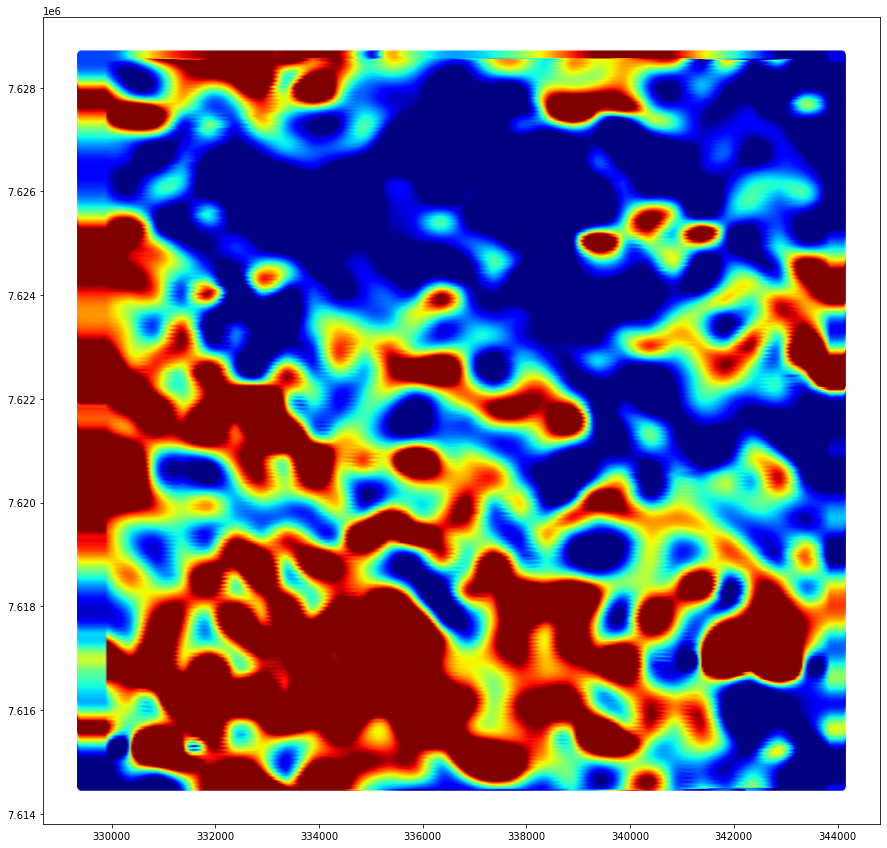

In [140]:
geo_data.plot(figsize = (15, 15), column = 'THKRAZAO', cmap = 'jet', vmin = np.percentile(geo_data.THKRAZAO,20),
          vmax = np.percentile(geo_data.THKRAZAO,80))

In [141]:
lito

,Litologia,geometry
0,NpGM,"POLYGON ((329556.288 7614512.402, 329553.552 7..."
1,NpGM,"POLYGON ((329550.870 7615028.946, 329549.753 7..."
2,NpGM,"POLYGON ((329527.948 7617214.349, 329518.242 7..."
3,NpGM,"POLYGON ((329484.688 7621338.655, 329409.535 7..."
4,NpGM,"POLYGON ((333613.505 7628546.006, 334660.842 7..."
...,...,...
224,PGQ,"POLYGON ((337908.605 7618548.173, 337902.697 7..."
225,PMAI,"POLYGON ((338444.152 7618636.810, 338443.301 7..."
226,PMAI,"POLYGON ((337933.624 7618427.204, 337943.457 7..."
227,PGQ,"POLYGON ((338030.980 7618470.025, 338031.412 7..."


In [155]:
lito_caconde = pd.read_csv('../../database/csv/litologia/LITOLOGIA_CACONDE2.csv')
lito_caconde

,Litologia,Unnamed: 1
0,NpGM,NaN
1,NpGM,NaN
2,NpGM,NaN
3,NpGM,NaN
4,NpGM,NaN
...,...,...
224,PGQ,NaN
225,PMAI,NaN
226,PMAI,NaN
227,PGQ,NaN


In [156]:
lito_caconde['geometry'] = [geometry.Point(x, y) for x, y in zip(data['X'], data['Y'])]

ValueError: Length of values (600000) does not match length of index (229)